# Prep Course Capstone Project

## Data

TMDB Dataset found at:
https://www.kaggle.com/tmdb/tmdb-movie-metadata

This Dataset from The Movie Database contains information on almost 5,000 films from 1916 to 2017.  Features include numeric variables like budget and revenue, as well as categorical variables like genre and language.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
%matplotlib inline

In [2]:
movies = pd.read_csv('~/Desktop/Data_Science/tmdb/tmdb_5000_movies.csv')

In [3]:
movies.shape

(4803, 20)

4803 films are listed with information in 12 columns.  First, we'll remove some columns beyond the scope of this project to focus on some elements.

In [4]:
#Remove some columns beyond the scope of this project
movies = movies.drop(['homepage', 'id', 'overview', 'original_title', 'keywords', 'production_companies', 'production_countries', 'tagline'], axis=1)
movies.head()

,budget,genres,original_language,popularity,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,150.437577,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,139.082615,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,107.376788,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,112.312950,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,43.926995,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124


In [5]:
movies.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


Now we can focus on some select columns.  The financial aspects of these films are conveyed by looking at budget and revenue.  Genre will be used to establish some simple descriptions of the films.  When combined with release date, we can look at this information over time.

### Release Year
To make more concise use of the release date, we'll extract the year.  Then we can explore films by release year.

In [6]:
#create method to extract year from release date
def ExtractYear(val):
    tokens = val.split('-')
    return tokens[0]

#streamline release date data to string
movies['release_date'] = movies['release_date'].astype(str)

#apply year extraction method to release date
movies['release_year'] = movies['release_date'].apply(ExtractYear)

#turn release year data into numbers
movies['release_year'] = pd.to_numeric(movies['release_year'], errors='coerce', downcast='integer')

In [7]:
movies.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,release_year
count,4.803000e+03,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000,4802.000000
mean,2.904504e+07,21.492301,8.226064e+07,106.875859,6.092172,690.217989,2002.468763
std,4.072239e+07,31.816650,1.628571e+08,22.611935,1.194612,1234.585891,12.414354
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1916.000000
25%,7.900000e+05,4.668070,0.000000e+00,94.000000,5.600000,54.000000,1999.000000
50%,1.500000e+07,12.921594,1.917000e+07,103.000000,6.200000,235.000000,2005.000000
75%,4.000000e+07,28.313505,9.291719e+07,118.000000,6.800000,737.000000,2011.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2017.000000


The earliest record is from 1916, with very few films from 1916 through the 5th quantile, so we'll leave those out.

In [8]:
movies = movies[movies['release_year'] > movies['release_year'].quantile(0.05)]

In [44]:
movies.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,release_year
count,4.550000e+03,4550.000000,4.550000e+03,4548.000000,4550.000000,4550.000000,4550.000000
mean,3.036340e+07,21.680558,8.453674e+07,106.155233,6.049802,704.043077,2004.621319
std,4.138421e+07,32.222683,1.658643e+08,21.734581,1.193490,1252.162604,8.003167
min,0.000000e+00,0.001186,0.000000e+00,0.000000,0.000000,0.000000,1980.000000
25%,8.700000e+05,4.808317,0.000000e+00,93.000000,5.600000,55.000000,2000.000000
50%,1.500000e+07,13.247682,1.984224e+07,103.000000,6.200000,242.000000,2006.000000
75%,4.000000e+07,28.562784,9.605755e+07,117.000000,6.800000,755.000000,2011.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2017.000000


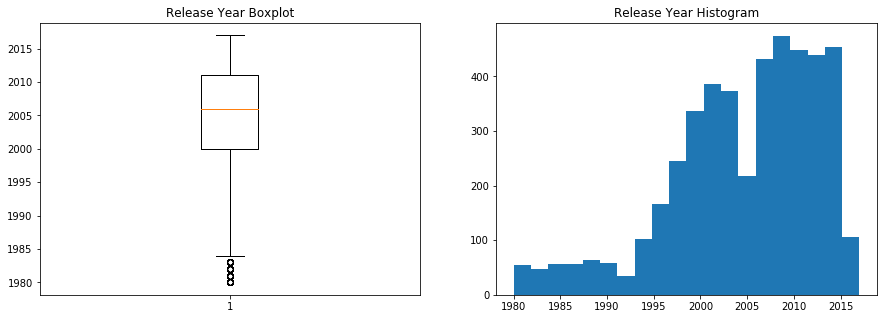

In [27]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(movies['release_year'].dropna(how = 'any'))
plt.title('Release Year Boxplot')

plt.subplot(1, 2, 2)
plt.hist(movies['release_year'].dropna(how = 'any'), bins=20)
plt.title('Release Year Histogram')

plt.show()

Now we are better able to see our release year data by starting with information from 1980.  We can see an increase in film listings from the mid-1990s to early 2000s, then a fairly steady number from there (less a momentary dip in the mid-2000s)

### Genres

In [45]:
import ast

#create method to extract individual genres from genres column
def ExtractGenreAsList(dictionary_genre):
    dictionary_genre = ast.literal_eval(dictionary_genre)
    list_genres = []
    for entry in dictionary_genre:
        list_genres.append(entry['name'])
    return list_genres

#apply genre extraction method to genres column
movies["genre_list"] = movies["genres"].apply(ExtractGenreAsList)

In [46]:
#extract unique genres from genre list column
unique_genres = []
for row in movies["genre_list"]:
    for genres in row:
        unique_genres.append(genres)
unique_genres = set(unique_genres)       
print(unique_genres)

{'War', 'Science Fiction', 'Romance', 'Comedy', 'Horror', 'Fantasy', 'Adventure', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Music', 'Western', 'Action', 'Documentary', 'History', 'TV Movie', 'Mystery', 'Foreign'}


In [47]:
#create a new sorted list from the set of unique genres
genre_list = []
for genre in unique_genres:
    genre_list.append(genre)
genre_list.sort()
print(genre_list)

['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']


In [48]:
#create method to identify which genre column names are listed for each film (row)
def GetGenrePerRow(row, genre):
    if genre in row:
        return 1
    else:
        return 0
    
#apply genre method to genre list column
for genre in genre_list:
    movies[genre] = movies["genre_list"].apply(lambda x: GetGenrePerRow(x, genre))

In [49]:
movies.head()

,budget,genres,original_language,popularity,release_date,revenue,runtime,spoken_languages,status,title,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,150.437577,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,...,0,0,0,0,0,1,0,0,0,0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,139.082615,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,...,0,0,0,0,0,0,0,0,0,0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,107.376788,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,...,0,0,0,0,0,0,0,0,0,0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,112.312950,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,...,0,0,0,0,0,0,0,1,0,0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,43.926995,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,...,0,0,0,0,0,1,0,0,0,0


In [50]:
#get list of total appearances of each genre
genre_count = pd.DataFrame(index = genre_list)
total_list = []
for genre in genre_list:
    total = movies[genre].sum()
    total_list.append(total)

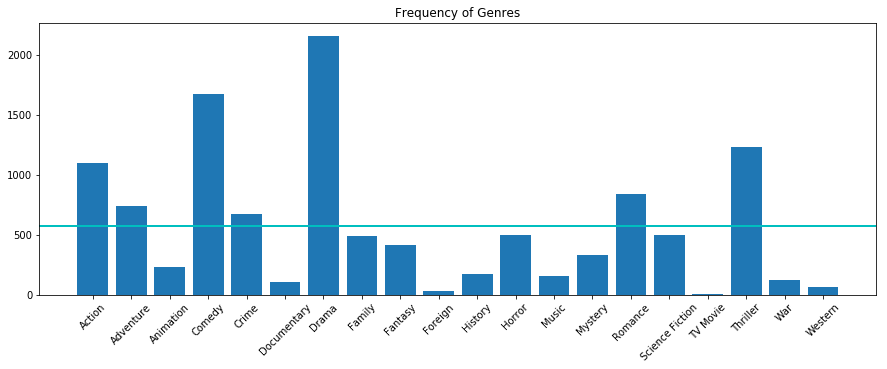

Genre Mean:  575.65


In [55]:
plt.figure(figsize=(15, 5))
plt.bar(genre_list, total_list)
plt.xticks(rotation = 45)
plt.axhline(np.mean(total_list), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.title('Frequency of Genres')
plt.show()
print('Genre Mean: ', np.mean(total_list))

This bar chart displays the variation in frequency of appearance for the twenty genres.  Seven genres - Drama, Comedy, Thriller, Action, Romance, Adventure and Crime - appear with greater frequency than the mean.

### Budget

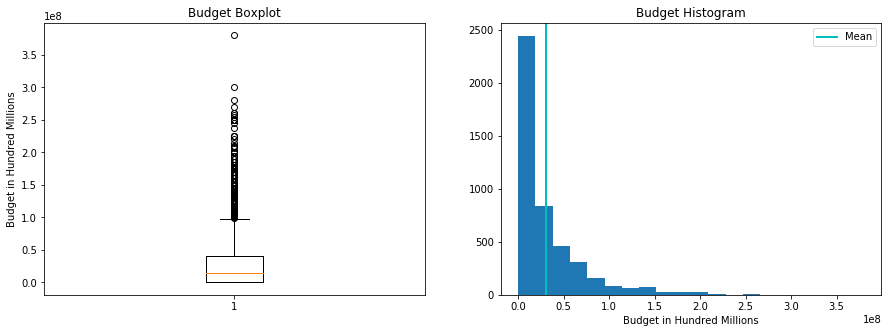

Budget Mean:  30363396.80043956


In [38]:
#budget

budget = movies['budget']

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(budget)
plt.title('Budget Boxplot')
plt.ylabel('Budget in Hundred Millions')

plt.subplot(1, 2, 2)
plt.hist(budget, bins=20)
plt.title('Budget Histogram')
plt.axvline(budget.mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.xlabel('Budget in Hundred Millions')
plt.legend(loc='upper right') 

plt.show()
print('Budget Mean: ', budget.mean())

We can see that the budget is heavily skewed to the right, with a much larger number of films (nearly 75% of those listed) with budgets well less than the mean of $30 million.

### Revenue

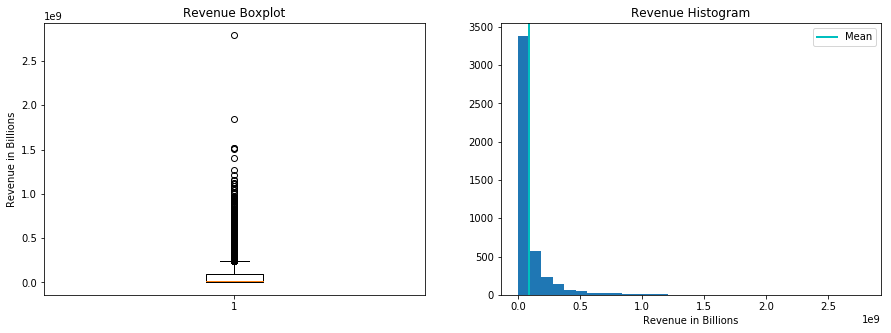

Revenue Mean:  84536737.40813187


In [43]:
#revenue

revenue = movies['revenue']

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(revenue)
plt.title('Revenue Boxplot')
plt.ylabel('Revenue in Billions')

plt.subplot(1, 2, 2)
plt.hist(revenue, bins=30)
plt.title('Revenue Histogram')
plt.axvline(revenue.mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper right') 
plt.xlabel('Revenue in Billions')

plt.show()
print('Revenue Mean: ', revenue.mean())

Like budget, the revenue data is also right skewed.  Here we see most films (again almost 75%) fall below the mean of $84.5 million.

## Questions

### Question 1: How has frequency of genres changed over time?

In [63]:
movies.columns

Index(['budget', 'genres', 'original_language', 'popularity', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'title',
       'vote_average', 'vote_count', 'release_year', 'genre_list', 'Action',
       'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

First we take a slice of the dataset so we're just dealing with the individual columns for each genre and the year of release

In [67]:
genre_info = movies.iloc[:, 12:]
genre_info.describe()

,release_year,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
count,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,...,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000
mean,2004.621319,0.240879,0.162637,0.050330,0.366813,0.146813,0.023736,0.474066,0.108132,0.090769,...,0.037582,0.109451,0.034286,0.072967,0.183736,0.109890,0.001538,0.269890,0.026154,0.013407
std,8.003167,0.427664,0.369075,0.218648,0.481988,0.353958,0.152243,0.499382,0.310581,0.287312,...,0.190205,0.312238,0.181982,0.260111,0.387312,0.312787,0.039197,0.443951,0.159610,0.115021
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2006.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2011.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,2017.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
genre_agg = genre_info.groupby('release_year').aggregate(np.sum)
genre_agg.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1980.0,5,3,0,6,1,0,9,0,2,0,3,3,3,1,2,5,0,3,0,2
1981.0,9,10,1,8,3,0,10,2,2,0,5,5,0,2,4,4,0,8,3,1
1982.0,8,6,0,6,2,0,8,2,5,0,1,8,0,2,2,8,0,7,1,1
1983.0,7,7,0,5,3,0,10,1,3,0,1,3,2,1,5,6,0,8,0,2
1984.0,12,7,0,9,6,0,10,2,6,0,3,7,3,1,3,8,0,7,0,0


In [78]:
genre_agg.describe()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,28.842105,19.473684,6.026316,43.921053,17.578947,2.842105,56.763158,12.947368,10.868421,0.868421,4.500000,13.105263,4.105263,8.736842,22.000000,13.157895,0.184211,32.315789,3.131579,1.605263
std,18.871581,12.290926,5.916020,33.683248,12.413227,3.605749,44.179263,10.682007,6.921065,1.234001,3.462151,9.545876,3.689206,7.831621,17.921752,8.741100,0.562584,23.269404,2.839595,1.603029
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.250000,9.000000,0.250000,11.000000,4.000000,0.000000,11.000000,4.000000,4.250000,0.000000,1.250000,6.000000,1.000000,1.250000,5.000000,5.000000,0.000000,9.000000,1.000000,0.250000
50%,25.000000,17.500000,4.000000,37.500000,20.000000,1.000000,55.000000,9.000000,10.000000,0.000000,4.000000,9.500000,3.000000,6.000000,21.000000,12.000000,0.000000,31.500000,2.500000,1.000000
75%,46.000000,31.500000,11.000000,81.500000,28.750000,6.500000,98.500000,21.500000,16.000000,2.000000,7.750000,20.750000,7.000000,15.000000,38.750000,19.000000,0.000000,53.000000,4.750000,2.000000
max,58.000000,40.000000,17.000000,97.000000,37.000000,10.000000,133.000000,35.000000,25.000000,4.000000,13.000000,33.000000,12.000000,28.000000,57.000000,32.000000,2.000000,69.000000,11.000000,7.000000


In [77]:
print(genre_agg)

              Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  \
release_year                                                                    
1980.0             5          3          0       6      1            0      9   
1981.0             9         10          1       8      3            0     10   
1982.0             8          6          0       6      2            0      8   
1983.0             7          7          0       5      3            0     10   
1984.0            12          7          0       9      6            0     10   
1985.0            10         10          0       5      3            0     10   
1986.0             7          7          0       8      4            0      9   
1987.0             8          9          1      13      3            0     11   
1988.0             7          6          2      10      4            0     12   
1989.0            11         10          0      12      3            1     11   
1990.0             8        

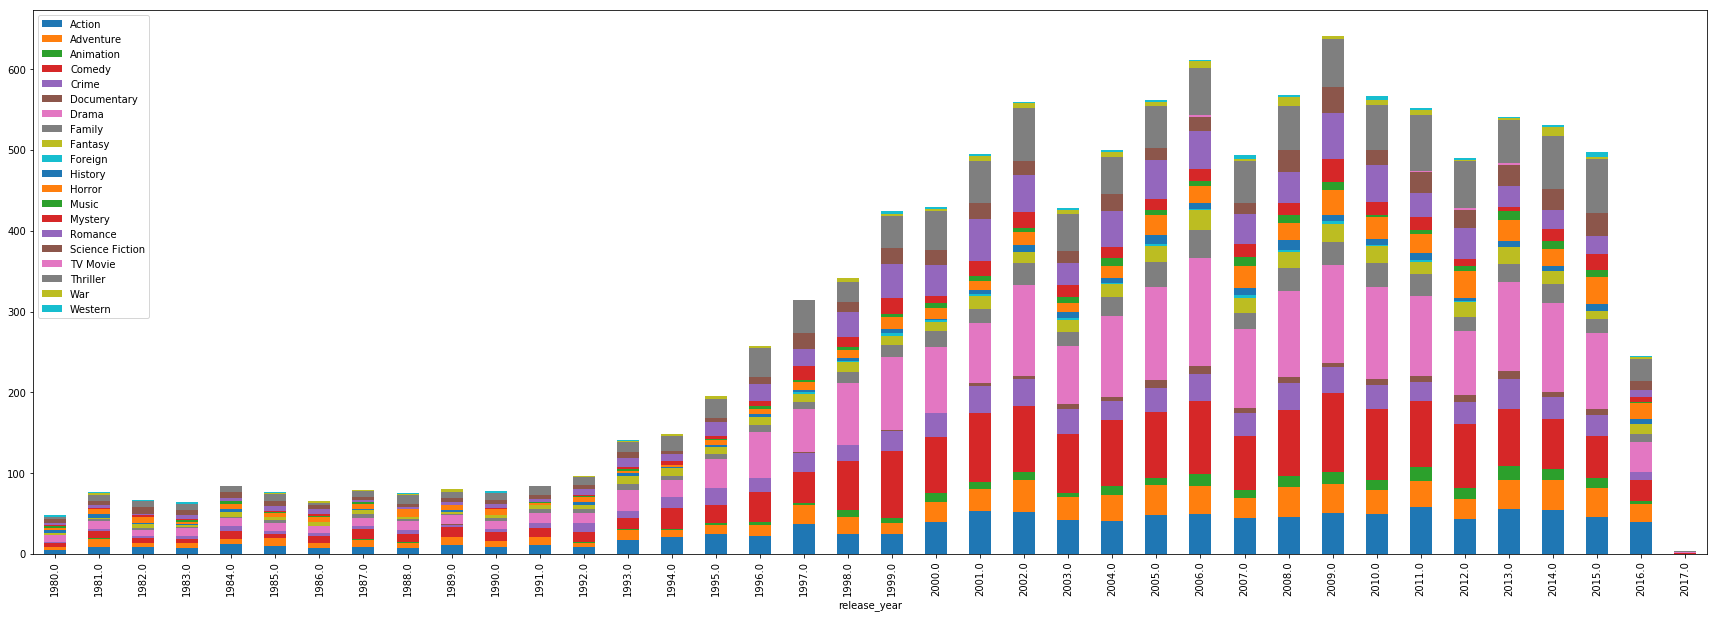

In [71]:
genre_agg.plot.bar(stacked='true', figsize=(30,10))

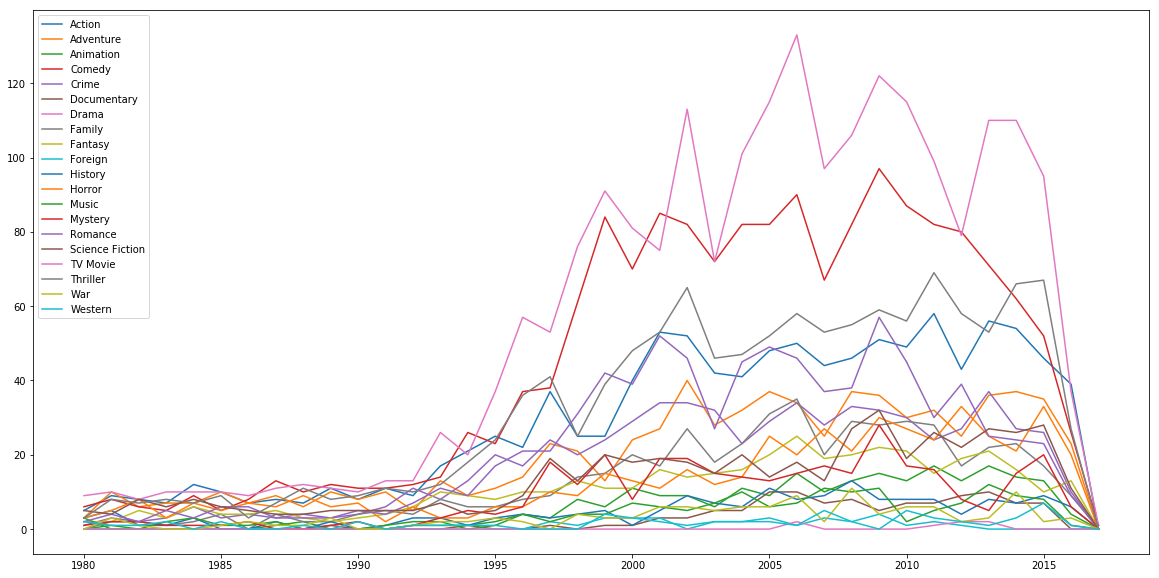

In [76]:
plt.figure(figsize=(20, 10))
plt.plot(genre_agg)
plt.legend(genre_list, loc='upper left')
plt.show()

Here we see that the frequency of Drama films has remained steadily among the highest of all genres, but it is interesting to see how the rank of genres has varied over the years.
Action surged to most common in 1984. 
Comedy surged to the lead in 1994 and 2001, and again to a lesser extent in 2003 and 2012.
Romance and Science Fiction peaked in 2009, both more than doubling their mean frequency.

### Question Two: Does budget impact profitablity?

First we need to create a metric for profitability.  We can do this by subtracting the budget of a film from it's revenue and calling that value profit.

In [80]:
#remove any films not listing revenue information
money = movies[movies.revenue != 0]

#remove any films not listing budget information
money = money[money.budget != 0]

#create new feature of profit by subtracting budget from revenue
money['profit'] = money['revenue'] - money['budget']

In [82]:
money[['budget', 'revenue', 'profit']].describe()

,budget,revenue,profit
count,3.026000e+03,3.026000e+03,3.026000e+03
mean,4.294318e+07,1.259592e+08,8.301604e+07
std,4.486826e+07,1.900894e+08,1.614368e+08
min,7.000000e+00,5.000000e+00,-1.657101e+08
25%,1.280150e+07,1.857764e+07,-1.930338e+05
50%,2.800000e+07,5.949429e+07,2.838447e+07
75%,6.000000e+07,1.521287e+08,1.006364e+08
max,3.800000e+08,2.787965e+09,2.550965e+09


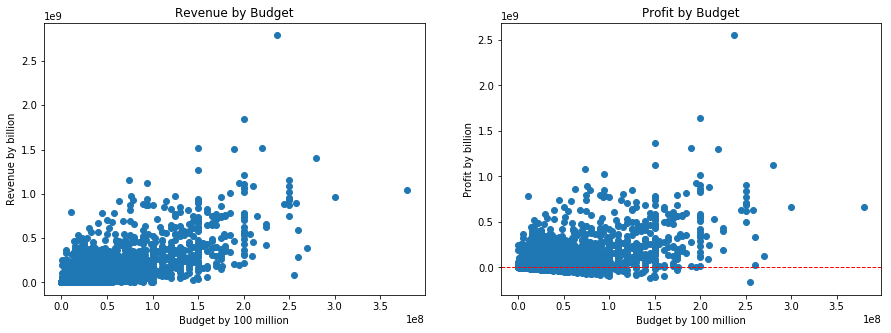

In [85]:
#Budget and Profit

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(x=money['budget'], y=money['revenue'])
#plot regression line
plt.title('Revenue by Budget')
plt.xlabel('Budget by 100 million')
plt.ylabel('Revenue by billion')

plt.subplot(1, 2, 2)
plt.scatter(x=money['budget'], y=money['profit'])
#plot regression line
plt.axhline(0, color='red', linestyle='dashed', linewidth=1, label="Break Even Mark")
plt.title('Profit by Budget')
plt.xlabel('Budget by 100 million')
plt.ylabel('Profit by billion')

plt.show()

### Question Three: Has profitability changed over time

Text(0.5,1,'Average Budgets by Release Year')

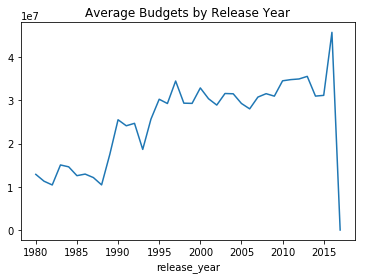

In [34]:
movies.groupby(['release_year']).mean()['budget'].plot()
plt.title('Average Budgets by Release Year')

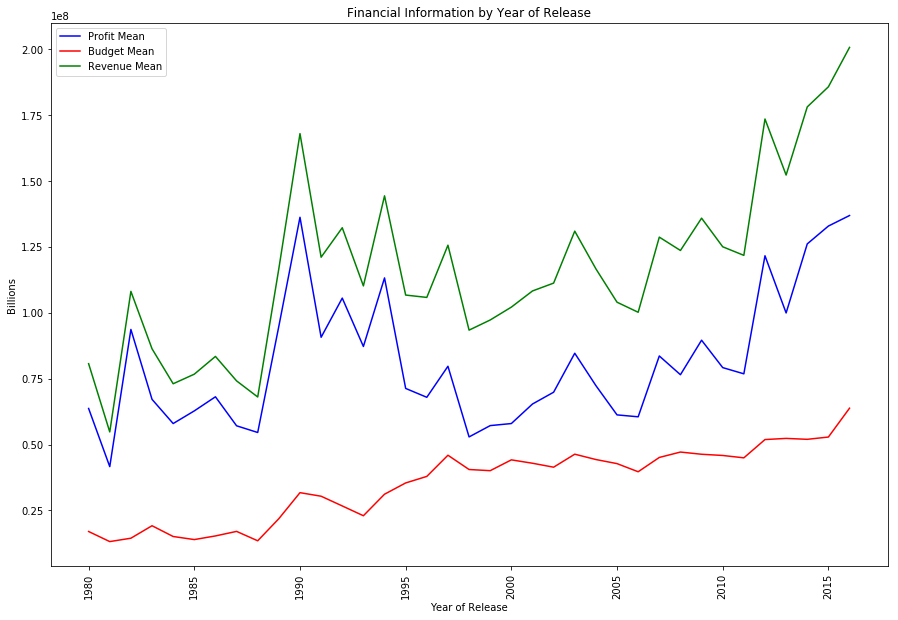

In [93]:
plt.figure(figsize=(15, 10))

money.groupby(['release_year']).mean()['profit'].plot(color='b', label="Profit Mean")
money.groupby(['release_year']).mean()['budget'].plot(color='red', label="Budget Mean")
money.groupby(['release_year']).mean()['revenue'].plot(color='green', label="Revenue Mean")
plt.xticks(rotation = 90)
plt.legend(loc='upper left')
plt.title('Financial Information by Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('Billions')

plt.show()